# Question 1 -- Sales data

In [14]:
import pandas as pd

In [15]:
file_name = '2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv'
sales = pd.read_csv(file_name)
sales.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [16]:
sales.shape

(5000, 7)

## a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

As we take a closer look we can clearly see that when we plot the distribution of order_amount in a boxplot there are a lot of outliers going as high as 700000, thus evaluating order_amount by *median* here seems to be the better choice.

<AxesSubplot:>

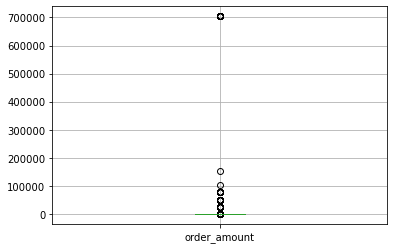

In [5]:
sales[['order_amount']].boxplot()

In [6]:
f"Using median as the measurement for AOV, we get {sales['order_amount'].median()}, which is far more informative as per the purpose of AOV."

'Using median as the measurement for AOV, we get 284.0, which is far more informative as per the purpose of AOV.'

At a even closer look, we discover that the outlier exhibits some interesting traits, that when plotting the outliers of the dataset, we're still getting a large spike at the 70000 mark with high frequency

<AxesSubplot:ylabel='Frequency'>

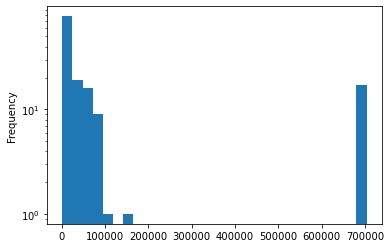

In [7]:
cutoff_order_amount = sales['order_amount'].quantile(.75) + 1.5*(sales['order_amount'].quantile(.75) - sales['order_amount'].quantile(.25))
sales_outlier = sales[sales['order_amount'] > cutoff_order_amount]
sales_outlier['order_amount'].plot.hist(logy = True, bins = 30)

To further investigate, I've filtered out all the entries that has order amount over 600000; and by doing so some interesting patterns is revealed

In [8]:
sales_700000 = sales[sales['order_amount'] > 600000]
sales_700000

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


At a closer look, these orders all made between the same user(user_id == 607) and the same buyer(shop_id == 42). The payments are all made with credit cards and the time are all at 4 am exactly, meaning these purchases are made automatedly. At some days, the same order was made 2 or 3 times. 

<AxesSubplot:ylabel='Frequency'>

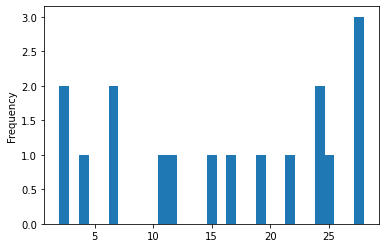

In [9]:
pd.to_datetime(sales_700000['created_at'], format = '%Y-%m-%d %H:%M:%S').dt.day.plot.hist(bins = 31)

Honestly, this rises suspicion regarding Money Laundering, but it could also just be a wholesaler ordering from a distributor and the fact that none of the orders are made on Sundays supports that assumption. We can also see that due to the absence of Sunday orders, significantly more orders are placed on Mondays. 

<AxesSubplot:ylabel='Frequency'>

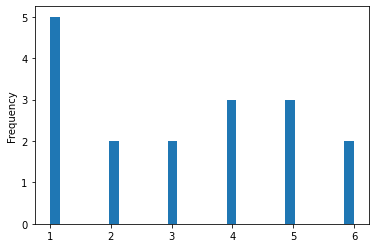

In [10]:
pd.to_datetime(sales_700000['created_at'], format = '%Y-%m-%d %H:%M:%S').dt.dayofweek.plot.hist(bins = 31)

## b. What metric would you report for this dataset and what are their values?

Going forward, I will not be including the transaction between shop 42 and user 607 since they are not representative at all to the rest of the dataset. 

In [11]:
sales = sales[(sales['user_id'] != 607) | (sales['shop_id'] != 42)]

In [12]:
sales.shape

(4983, 7)

### 1. What are the top selling stores by total amount and how are the sales or stores distributed?

In [13]:
sales.groupby('shop_id').sum().sort_values('order_amount', ascending = False)[['order_amount', 'total_items']].head()

,order_amount,total_items
shop_id,,
78,2263800,88
89,23128,118
81,22656,128
6,22627,121
42,22176,63


As shown above, the shop with the most sale by far is shop 78, which by the looks of things is a high-end designer shop since the unit price of their snickers extremely high. With shop 78 removed, we can now take a closer look at the rest of the stores.

<AxesSubplot:ylabel='Frequency'>

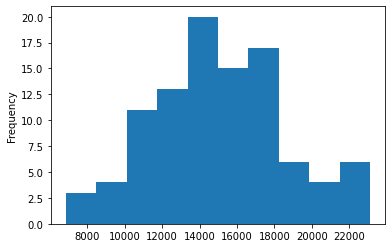

In [14]:
sales[sales['shop_id'] != 78].groupby('shop_id').sum()['order_amount'].plot.hist()

As shown above, the sales for the majority of stores(stores excluding 78 and 42) are approximately normally distributed with the mean being around 15000 in the month of March. 

### 2. How is the price of the snickers distributed and what kind of snickers earns us the most money (The question is a bit ambiguous, from what I'm interpreting each store sells a unique type of snickers)

In [15]:
# first create a new column to record snicker price per unit
sales['price_per_unit'] = sales['order_amount']/sales['total_items']

We have some outliers that are very high in price, so in order to further understand the distribution of snicker price it's a good idea to divide them into categories.

<AxesSubplot:>

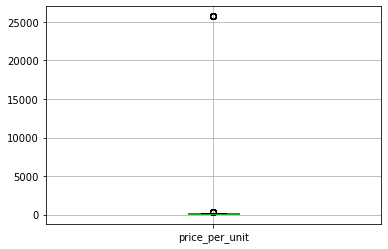

In [16]:
sales[['price_per_unit']].boxplot()

Define:
 - Affordable snickers as snickers with prices lower than 25 percentile
 - Regular snickers as those within IQR
 - Expensive snickers as those higher than 74 percentile but lower than (75 percentile + 1.5*IQR)
 - Luxurious snickers as those that are priced over (75 percentile + 1.5*IQR)

In [17]:
Q25 = sales['price_per_unit'].quantile(.25)
Q75 = sales['price_per_unit'].quantile(.75)
IQR = sales['price_per_unit'].quantile(.75) - sales['price_per_unit'].quantile(.25)
type_product = lambda x: 'Affordable' if x < Q25 else ('Regular' if x < Q75 else ('Expensive' if x < Q75 + 1.5*IQR else 'Luxurious'))
sales['type_product'] = sales['price_per_unit'].apply(type_product)


<AxesSubplot:ylabel='order_amount'>

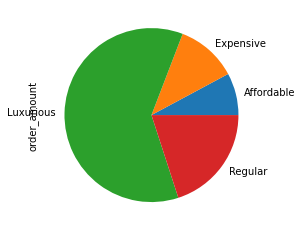

In [18]:
sales.groupby('type_product').sum()['order_amount'].plot.pie()

Since Shopify earns money by commission, in this particular dataset we can conclude that the majority of the revenue we earn is from Luxurious snicker sales. However, this figure is very much influenced by the sales by shop 78, which as we've established is probably some kind of designer brand. So let's take a look at how the data is without it.

<AxesSubplot:ylabel='order_amount'>

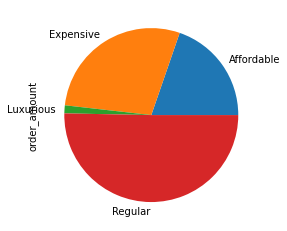

In [19]:
sales[sales['shop_id'] != 78].groupby('type_product').sum()['order_amount'].plot.pie()

Without the influence of shop 78, we can tell that more than half of out income is coming from regular snickers with only a very small portion coming from Luxurious snickers

We can plot out the proportion of sales by payment method using the same method. As shown down below, more than 70% of sales are done using cards. This could protentially be very useful when deciding the specifics in our monetary rate, for instance, what percentage to charge a credit card sale for.

<AxesSubplot:ylabel='order_amount'>

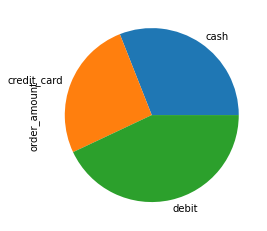

In [20]:
sales.groupby('payment_method').sum()['order_amount'].plot.pie()

## 3. Product Suggestion by Network Analysis

Maybe some day down the line we would like to give shoppers recommendations on where else to shop! Or if we were to treat each shop as an individual product and treat the entire dataset as the data within a single shop, we could make recommendations during checkout based on the product the shopper has in their cart! By using network analysis we can get a better understanding of how each shop/item is related to another.

In [17]:
import networkx as nx

# first we have to construct relationships between shops and shoppers
G = nx.Graph()

shops = set()

count = 0

for _, row in sales.iterrows():
    
    shop, user = row["shop_id"], row["user_id"]
    
    shops.add(shop)
    
    G.add_edge(user, shop)
    
    count += 1

Then by using a bipartite graph we can project the relationships onto a network, where the edge of each shop is weighted  to represent how many shoppers they have in common. The higher the weight, the more likely someone who shops at one of them were to shop at the other.

In [18]:
from networkx.algorithms import bipartite

G_folded = bipartite.weighted_projected_graph(G, shops)

print(nx.info(G_folded))

Graph with 100 nodes and 4942 edges


If we graph using 4942 edges, the result would be way too clustered to read

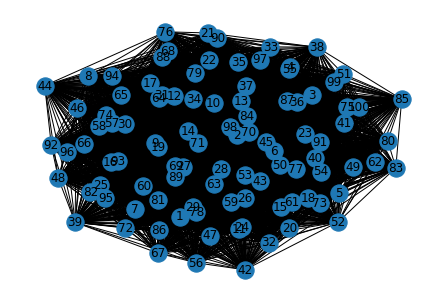

In [55]:
components = sorted(nx.connected_components(G_folded), key=len, reverse=True)
largest_component = components[0]

nx.draw_spring(G_folded.subgraph(largest_component), with_labels = True)

Thus, we need to remove less important edges until the graph clears up, for this particular application, that means setting the weight threshold to 15

In [19]:
G_filtered = G_folded.copy()

G_filtered.remove_edges_from([(n1, n2) for n1, n2, w in G_filtered.edges(data="weight") if w < 15])

print(nx.info(G_filtered))

Graph with 100 nodes and 27 edges


Now with only 27 edges, the graph becomes a lot more readable. As we can see, shop 71 seems to be related to a lot of other shops, meaning it's probably for everyone. Thus if we were to have a Shopify main page with the intention of drawing in customers, putting shop 71 on it would probably be a great choice; since it would be a great gateway to a lot of other shops, and therefore keep the user within the shopify ecosystem.

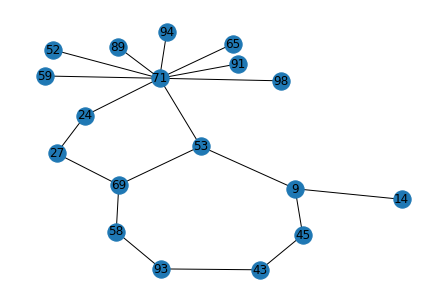

In [32]:
components = sorted(nx.connected_components(G_filtered), key=len, reverse=True)
largest_component = components[0]

nx.draw_spring(G_filtered.subgraph(largest_component), with_labels = True)

With the weights visualized, we now can get a better understanding of how related these shops are. As seen in the graph, shop 71 and 91, as well as 53 and 9 are closest related to each other.

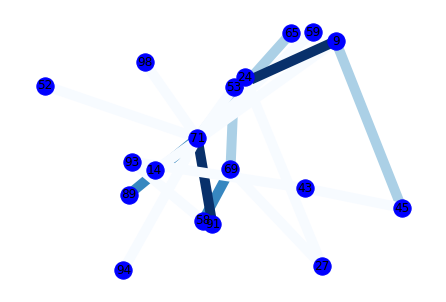

In [54]:
import matplotlib.pyplot as plt

edges,weights = zip(*nx.get_edge_attributes(G_filtered.subgraph(largest_component),'weight').items())
pos = nx.spring_layout(G_folded)
nx.draw(G_filtered.subgraph(largest_component), pos, node_color='b', edgelist=edges, edge_color=weights, width=10.0, edge_cmap=plt.cm.Blues, with_labels = True)
plt.savefig('edges.png')

I've also wrote a function that would pick out the top n related shops given the shop_id of a specific shop. 

In [26]:
import random
G_mod = G_folded.copy()
G_mod.remove_edges_from([(n1, n2) for n1, n2, w in G_mod.edges(data="weight") if w < 1])

def find_similar_shop(shops, top = 10):
    shops_with_connection = [x for x in G_mod.edges(data = 'weight') if x[0] == shops or x[1] == shops]
    try:
        # this can fail if the shop has less than #top other shops that connects to it
        top_weight = sorted([x[2] for x in shops_with_connection])[-top]
    except:
        # if it fails gives all shops it connects to
        top_weight = 0
    # select all shops above the weight, and then sample randomly from those that are equal in weight to meet the total number required.
    part_1 = [list(set([x[0]]).union(set([x[1]])).difference(set([shops])))[0] for x in shops_with_connection if x[2] > top_weight]
    part_2 = random.choices([list(set([x[0]]).union(set([x[1]])).difference(set([shops])))[0] for x in shops_with_connection if x[2] == top_weight], k = top - len(part_1))
    return part_1 + part_2

This can be implemented to make recommendations; for instance there are 8 slots for shop/product 1, we could run the following function:

In [29]:
find_similar_shop(1, 8)

[3, 64, 40, 43, 58, 43, 43, 43]

And make recommendations of these particular shops/products since they are most related to shop/product 1. 

And if we want to find out top 4 shops that are closest related to shop 78, the designer shop, we could do:

In [31]:
find_similar_shop(78, 4)

[15, 84, 93, 70]

# Question 2 -- SQL Queries

In [ ]:
# 1. How many orders were shipped by Speedy Express in total?
SELECT count(*) 
FROM Orders join Shippers
WHERE ShipperName = "Speedy Express";

'''52 orders were shipped by Speedy Express'''

# 2. What is the last name of the employee with the most orders?
SELECT max(orders), LastName FROM 
    (SELECT count(EmployeeID) as orders, lastName 
     FROM Orders natural join Employees
     GROUP BY EmployeeID);
    
'''Peacock is the last name, they made 40 orders'''
    

    
# 3. What product was ordered the most by customers in Germany?
SELECT ProductName, max(Quantity) FROM
    (SELECT ProductName, sum(Quantity) as Quantity 
     FROM OrderDetails natural JOIN Orders natural JOIN Customers natural JOIN Products
     WHERE Country = "Germany"
     GROUP BY ProductName);
    
'''Boston Crab Meat was most ordered by customers in Germany. The amount ordered was 160 units.'''

